In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

In [2]:
#mounting from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You have to include the full link to the csv file containing your dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Synthetic_mobile_txn.csv')

###**Data exploration**

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**Possible Red Flags:**
1.	If different orginator doing various types of transaction with only one particular beneficiary, then chances that beneficiary account is mule account or involve in money money laundering activities
2.	Different applicants sending to particular beneficiary
3.	IfmMore cash transaction in particular account, then there is high chance of money laundering
4.	Large volume of transaction in particular account, chances of money laundering



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#this data is imbalanced and highly scaled
print("max amount",data['amount'].max())
print("min amount",data['amount'].min())

max amount 92445516.64
min amount 0.0


In [ ]:

ML_df =data[data['isFraud'] == 1]
NoML_df = data[data['isFraud'] == 0]

print("Total No of Transactions =", len(data['isFraud']))

print("Total No of identified Money Laundered Transactions =", len(ML_df))
print("Percentage of identified Money Laundered Transactions =", 1.*len(ML_df)/len(data['isFraud'])*100.0, "%")
 
print("Total No of  NOT  money laundering transactions =", len(NoML_df))
print("Percentage of NOT money laundering transactions =", 1.*len(NoML_df)/len(data['isFraud'])*100.0, "%")


Total No of Transactions = 6362620
Total No of identified Money Laundered Transactions = 8213
Percentage of identified Money Laundered Transactions = 0.12908204481801522 %
Total No of  NOT  money laundering transactions = 6354407
Percentage of NOT money laundering transactions = 99.87091795518198 %


## **Data** **Visualization**

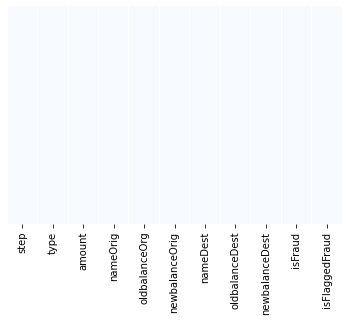

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
#Let's see if there is relationship between types of transaction and Money laundering transaction
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
#create scatter plot for fraud

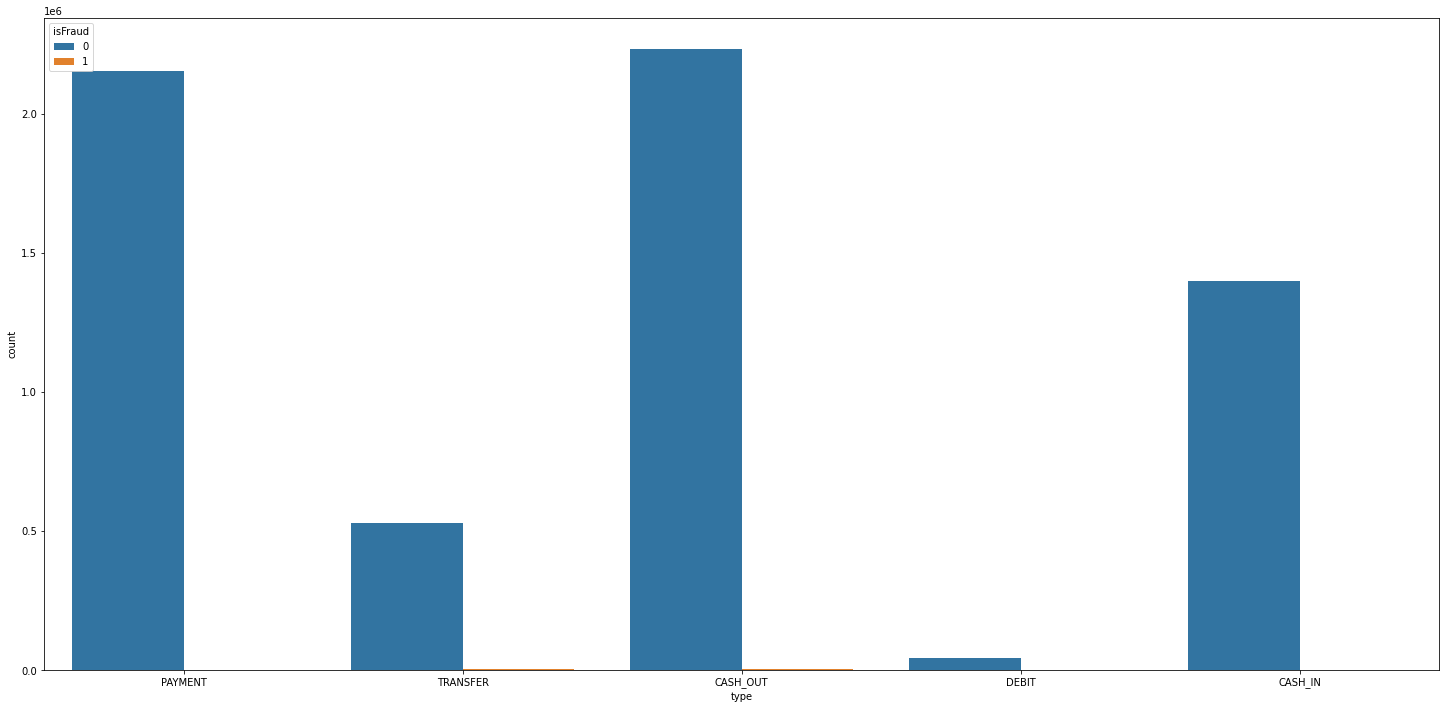

In [ ]:
plt.figure(figsize= [25, 12])
sns.countplot(x = 'type', hue = 'isFraud' , data = data)

Text(0.5, 0, 'Money Laundering in comparision to amount')

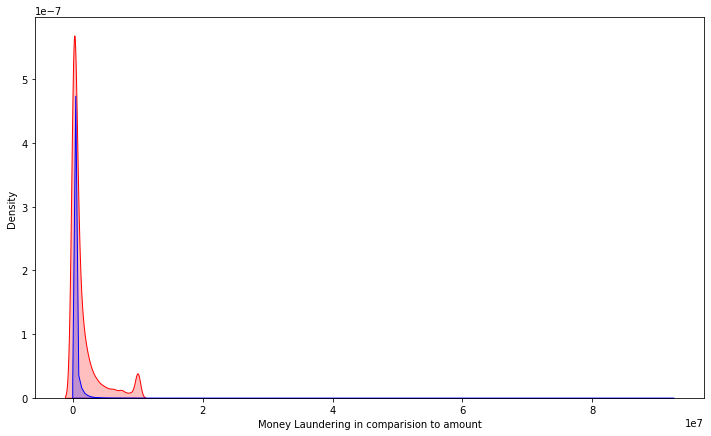

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

Fraud_df =data[data['isFraud'] == 1]
NoFraud_df = data[data['isFraud'] == 0]

plt.figure(figsize=(12,7))

sns.kdeplot(ML_df['amount'], label = 'Money Laundered Txn', shade = True, color = 'r')
sns.kdeplot(NoML_df['amount'], label = 'Not Money Laundered Txn', shade = True, color = 'b')

plt.xlabel('Money Laundering in comparision to amount')

### e8 is standard scientific notion, 2 actually indicates 2*1e8 = 2e8 = 2 * 10^7 = 20,000,000.
###Money laundering is happening around 10 lakhs to 30 lakhs amount, chances that this transaction are happening belopw threshold amount..

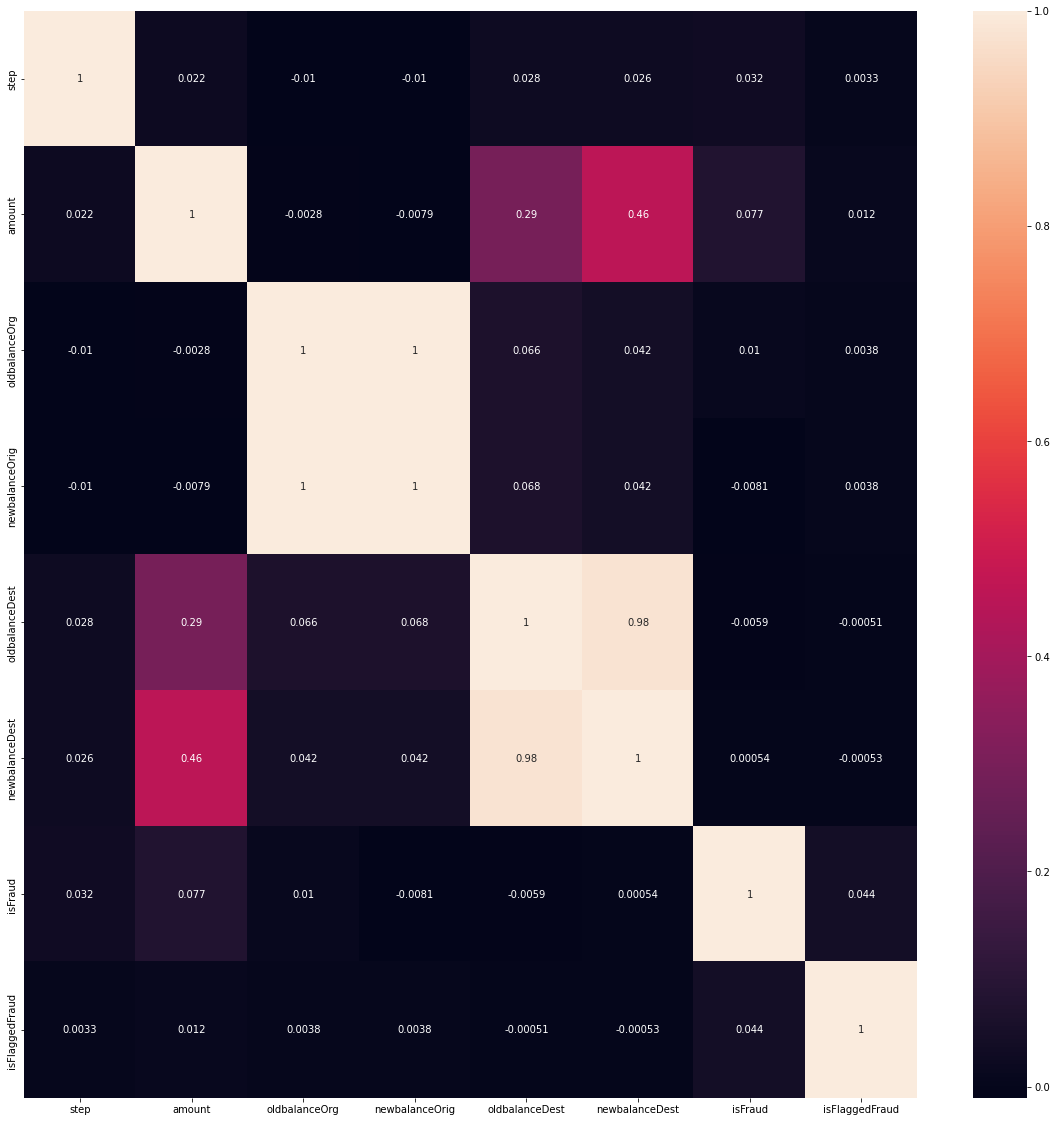

In [ ]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [ ]:
# no strong correlation between variable, it would be better if more feature like location of transaction initiated, location transaction settled, ip address, kYC status so on.
# more variable good

## **Preprocessing of Data**

In [4]:
from sklearn.preprocessing import StandardScaler
col_names = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

One Hot Code Conductor

In [9]:
data_extract=data[['type','isFraud']]

type_dummies = pd.get_dummies(data_extract['type'], drop_first = True)
data_extract.drop(['type'], axis=1, inplace=True)
new_data=pd.concat([data_extract,type_dummies, scaled_features], axis=1, ignore_index=False)
new_data.head()
new_data.to_csv('/content/drive/My Drive/Colab Notebooks/ML_data.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


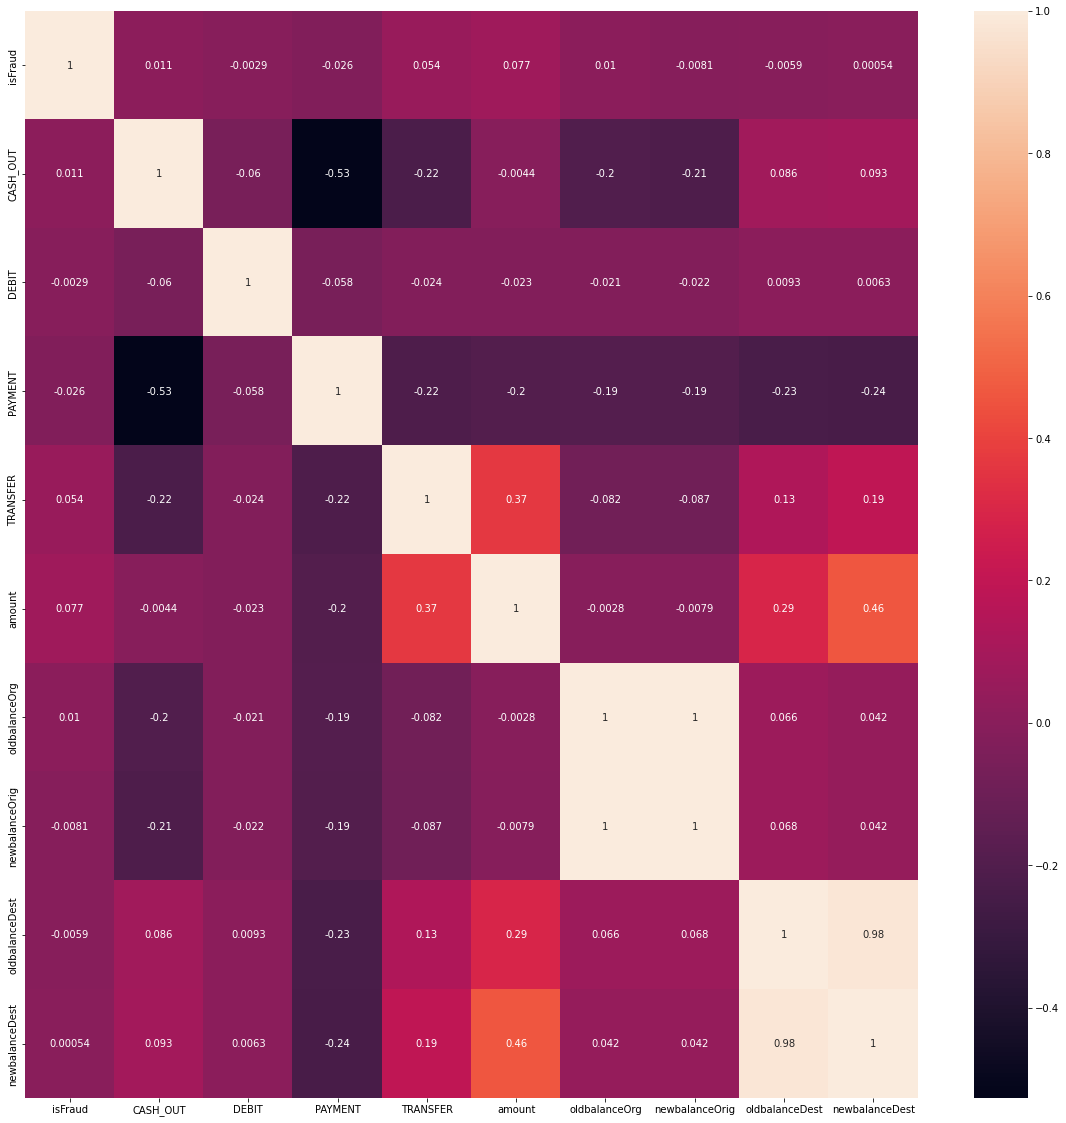

In [ ]:
correlations = new_data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [ ]:
# still no visible correlation
# newbalance and old balance correlation..may be...there is not transaction in the account

# **TRAIN AND DEPLOYMENT OF MODEL**

In [ ]:

X = new_data.iloc[:, new_data.columns != 'isFraud']
y = new_data.iloc[:, new_data.columns == 'isFraud']

In [ ]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [ ]:
X.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,1,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,1,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,0,0,0,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,0,0,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,1,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (4453834, 9)
Number transactions y_train dataset:  (4453834, 1)
Number transactions X_test dataset:  (1908786, 9)
Number transactions y_test dataset:  (1908786, 1)


In [ ]:
X_train.shape

(4453834, 9)

In [ ]:
X_test.shape

(1908786, 9)

## **Decision trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.89      0.89      0.89      2419

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X,y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res, test_size = 0.3, random_state=0) 
print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))


After OverSampling, the shape of X: (12708814, 9)
After OverSampling, the shape of y: (12708814, 1) 



In [ ]:
print('No of Money Laundering transction: {} \n'.format(y_res == 1))
print('No of NOT Money Laundering transction: {} \n'.format(y_res == 0))

No of Money Laundering transction:           isFraud
0           False
1           False
2            True
3            True
4           False
...           ...
12708809     True
12708810     True
12708811     True
12708812     True
12708813     True

[12708814 rows x 1 columns] 

No of NOT Money Laundering transction:           isFraud
0            True
1            True
2           False
3           False
4            True
...           ...
12708809    False
12708810    False
12708811    False
12708812    False
12708813    False

[12708814 rows x 1 columns] 



In [ ]:
decision_tree.fit(X_train_res,y_train_res.values.ravel())

DecisionTreeClassifier()

In [ ]:
y_pred_res = decision_tree.predict(X_test_res)

In [ ]:
y_res.value_counts()

isFraud
0          6354407
1          6354407
dtype: int64

In [ ]:
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905975
           1       1.00      1.00      1.00   1906670

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645



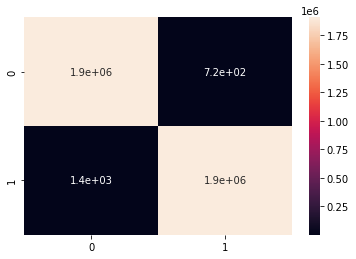

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_res, y_test_res)
sns.heatmap(cm, annot=True)

## **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.96      0.79      0.86      2419

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
random_forest.fit(X_train_res,y_train_res.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred_res = random_forest.predict(X_test_res)

In [ ]:
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905975
           1       1.00      1.00      1.00   1906670

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

